# Lecture 4: Finite Markov Chains

A good illustration of Markov chains with a nice '_playground_' can be found [here](http://setosa.io/ev/markov-chains/). The introduction includes an explanation of a transition (stochastic) matrix concept.

## Simulations

To simulate a Markov chain, we need its stochastic matrix $P$ and either an initial state or a probability distribution $\psi$ for initial state to be drawn from. The Markov chain is then constructed by a following way:

1. At time $t=0$, the $X_0$ is set to some fixed state or chosen from $\psi$;
2. At each subsequent time $t$, the new state $X_{t+1}$ is drawn from $X_t P$;

The module QuantEcon has very nice routines and reading material related to [Markov Chains](https://lectures.quantecon.org/jl/finite_markov.html). We follow some of it below. 

In [ ]:
Pkg.update()
Pkg.add("Gadfly")
Pkg.add("Plots")
Pkg.add("QuantEcon")

In [2]:
using QuantEcon
P = [.4 .6; .2 .8]; # Transition Matrix
mc = MarkovChain(P); # Initialization of a discreate Markov chain


X = simulate(mc, 100000); # second argument is the length of the chain (number of repeats)

println(mean(X .== 1)) # The probability to find a system in the state {1}

println(is_irreducible(mc)) # Testing for reducibility

println(period(mc)) # Find the period of a chain

println(is_aperiodic(mc)) # Testing for aperiodicity

0.24966
true
1
true


## Stationary Distributions

A distribution $\psi^*$ on the state space $S$ is called stationary or invariant for the transition matrix $P$, if $\psi^* = \psi^* P$. Recall that in this lecture we are assuming that the state space $S$ is finite. Then we can formulate two theorems:

**Theorem I:** Every stochastic matrix $P$ has at least one stationary distribution.

There may in fact be many stationary distributions corresponding to a given stochastic matrix $P$. For example, if $P$ is the identity matrix, then all distributions are stationary.

**Theorem II:** If $P$ is both aperiodic and irreducible, then

1. $P$ has exactly one stationary distribution $\psi^*$;
2. For any initial distribution $\psi_0$, we have $|\psi_0 P^t - \psi^*| \rightarrow 0$ as $t \rightarrow \infty$;

Note that part 1 of the theorem requires only irreducibility, whereas part 2 requires both irreducibility and aperiodicity. One easy sufficient condition for aperiodicity and irreducibility is that every element of $P$ is strictly positive.

In [3]:
P = [.4 .6; .8 .2]
mc = MarkovChain(P)

stationary_distributions(mc) # Computing a stationary distribution (where only one stationary distribution exists)

1-element Array{Array{Float64,1},1}:
 [0.5714285714285715,0.42857142857142855]

The next example illustrates convergence to the stationary distribution:


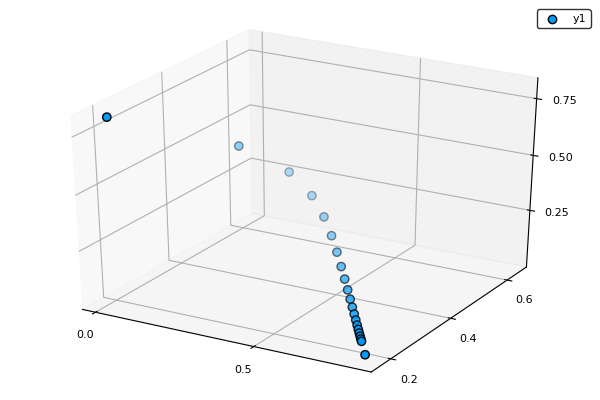

In [5]:
using Plots
pyplot()
using QuantEcon

P =[0.971 0.029 0.000
    0.145 0.778 0.077
    0.000 0.508 0.492]

psi = [0.0 0.2 0.8]

t = 20
x_vals = Array{Float64}(t+1)
y_vals = Array{Float64}(t+1)
z_vals = Array{Float64}(t+1)
colors = []

for i=1:t
    x_vals[i] = psi[1]
    y_vals[i] = psi[2]
    z_vals[i] = psi[3]
    psi = psi*P
    push!(colors, :red)
end
push!(colors, :black)

mc = MarkovChain(P)
psi_star = stationary_distributions(mc)[1]
x_vals[t+1] = psi_star[1]
y_vals[t+1] = psi_star[2]
z_vals[t+1] = psi_star[3]

scatter3d(x_vals, y_vals, z_vals)
# scatter(x_vals, y_vals, z_vals, color=colors)
# plot!(lims=(0, 1), ticks=[0.25 0.5 0.75]', legend=:none)

We can also illustrate the convergence to the stationary distribution in another way.

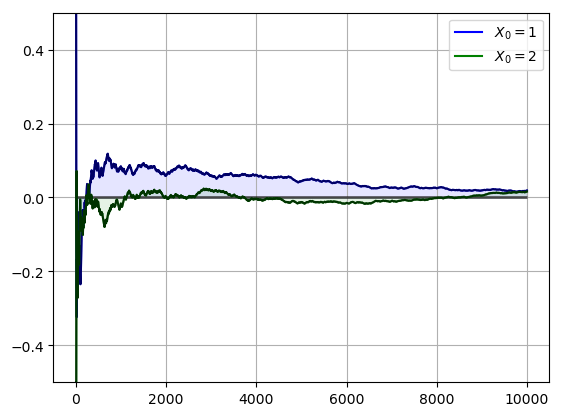

In [7]:
using PyPlot
using QuantEcon

α = β = 0.1
N = 10000 # The length of a Markov chain
p = β / (α + β) # The stationary probability to find a system in the {1} state 

P2 = [1-α  α   # Careful: P2 and p are distinct
     β  1-β]

mc2 = MarkovChain(P2)

fig, ax = subplots()
ax[:set_ylim](-0.5, 0.5)
ax[:grid]()
ax[:hlines](0, 0, N, lw=2, alpha=0.6)  # Horizonal line at zero

for (x0, col) in enumerate(["blue", "green"])
    # == Generate time series for system that starts at x0 == #
    X = simulate(mc2, N, init=x0);
    #X = mc_sample_path(mc2, x0, N)

    # == Compute fraction of time spent in state {1}, for each n == #
    X_bar = cumsum(X.==1) ./ (collect(1:N)) 

    # == Plot == #
    ax[:fill_between](1:N, zeros(N), X_bar - p, color=col, alpha=0.1)
    label = LaTeXString("\$X_0 = $x0\$")
    ax[:plot](X_bar - p, color=col, label=label)
    ax[:plot](X_bar - p, "k-", alpha=0.6)  # Overlay in black--make lines clearer
end

ax[:legend](loc="upper right")
fig[:show]()